**Xception**

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#os.environ['OMP_NUM_THREADS'] = '1'
#os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
tf.__version__

'2.8.2'

In [3]:
DATA_LIST = os.listdir('drive/MyDrive/Covid_Data_GradientCrescent/all/train')
DATASET_PATH  = 'drive/MyDrive/Covid_Data_GradientCrescent/all/train'
TEST_DIR =  'drive/MyDrive/Covid_Data_GradientCrescent/all/test'
IMAGE_SIZE    = (224, 224)
NUM_CLASSES   = len(DATA_LIST)
BATCH_SIZE    = 10  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS    = 100
LEARNING_RATE = 0.0001 # start off with high rate first 0.001 and experiment with reducing it gradually 

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=50,featurewise_center = True,
                                   featurewise_std_normalization = True,width_shift_range=0.2,
                                   height_shift_range=0.2,shear_range=0.25,zoom_range=0.1,
                                   zca_whitening = True,channel_shift_range = 20,
                                   horizontal_flip = True,vertical_flip = True,
                                   validation_split = 0.2,fill_mode='constant')


train_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "training",seed=42,
                                                  class_mode="categorical")

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,target_size=IMAGE_SIZE,
                                                  shuffle=True,batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,class_mode="categorical")

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


Found 216 images belonging to 4 classes.
Found 54 images belonging to 4 classes.


In [10]:
from keras.applications.xception import Xception
from tensorflow.keras import datasets, layers, models
from keras.models import Model, Sequential


inc_model = Xception(weights='imagenet', include_top=False)

# get layers and add average pooling layer
x = inc_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

# add fully-connected layer
x = tf.keras.layers.Dense(256, activation='relu')(x)

# add output layer
predictions = tf.keras.layers.Dense(4, activation='softmax')(x)

model = Model(inputs=inc_model.input, outputs=predictions)

# freeze pre-trained model area's layer
for layer in inc_model.layers:
    layer.trainable = False

# update the weight that are added
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

"""
---

xception_model = tf.keras.applications.Xception(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

for layer in xception_model.layers[:-3]:
    layer.trainable = False

x = layers.Flatten()(xception_model)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dense(4, activation='softmax')(x)

model = Model(xception_model.input, x)
model.summary()
"""
"""
model = Sequential()
for layer in xception_model.layers[:-4]:
    model.add(layer)
for layer in model.layers:
    layer.trainable = False

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

model.summary()
"""

83697664/83683744 [==============================] - 0s 0us/step


"\nmodel = Sequential()\nfor layer in xception_model.layers[:-4]:\n    model.add(layer)\nfor layer in model.layers:\n    layer.trainable = False\n\nmodel.add(layers.Flatten())\nmodel.add(layers.Dense(256, activation='relu'))\nmodel.add(layers.Dense(4, activation='softmax'))\n\nmodel.summary()\n"

In [11]:
model.compile(optimizer='adam',
                loss=tf.keras.losses.CategoricalCrossentropy(),
                metrics=['accuracy'])

#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

#raise NotImplementedError("Use the model.fit function to train your network")
history = model.fit(x=train_batches, epochs=NUM_EPOCHS, steps_per_epoch=STEP_SIZE_TRAIN, 
           validation_data=valid_batches, validation_steps=STEP_SIZE_VALID)

22
6


/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
21/21 [==============================] - 12s 413ms/step - loss: 1.4817 - accuracy: 0.3641 - val_loss: 1.0602 - val_accuracy: 0.5000
Epoch 2/100
21/21 [==============================] - 9s 411ms/step - loss: 0.8908 - accuracy: 0.6359 - val_loss: 0.8091 - val_accuracy: 0.6000
Epoch 3/100
21/21 [==============================] - 8s 373ms/step - loss: 0.6908 - accuracy: 0.7087 - val_loss: 0.8005 - val_accuracy: 0.6400
Epoch 4/100
21/21 [==============================] - 8s 371ms/step - loss: 0.6730 - accuracy: 0.7039 - val_loss: 0.9000 - val_accuracy: 0.5600
Epoch 5/100
21/21 [==============================] - 8s 368ms/step - loss: 0.6850 - accuracy: 0.6942 - val_loss: 0.6943 - val_accuracy: 0.6200
Epoch 6/100
21/21 [==============================] - 8s 368ms/step - loss: 0.6816 - accuracy: 0.7233 - val_loss: 0.7331 - val_accuracy: 0.6800
Epoch 7/100
21/21 [==============================] - 8s 378ms/step - loss: 0.6646 - accuracy: 0.6942 - val_loss: 0.9120 - val_accuracy: 0.600

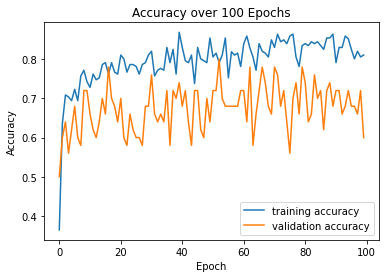

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title("Accuracy over 100 Epochs")
plt.legend(loc='lower right')

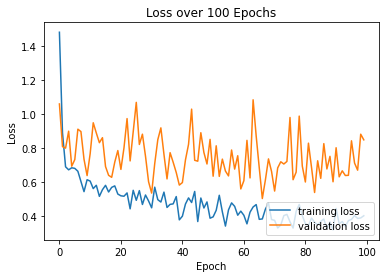

In [14]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss over 100 Epochs")
plt.legend(loc='lower right')

In [12]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

eval_generator = test_datagen.flow_from_directory(TEST_DIR,target_size=IMAGE_SIZE,
                                                  batch_size=1,shuffle=True,seed=42,class_mode="categorical")
eval_generator.reset()
print(len(eval_generator))
x = model.evaluate_generator(eval_generator,steps = np.ceil(len(eval_generator)),
                           use_multiprocessing = False,verbose = 1,workers=1)
print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Found 36 images belonging to 4 classes.
36


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


36/36 [==============================] - 2s 42ms/step - loss: 0.7349 - accuracy: 0.7222
Test loss: 0.7348639965057373
Test accuracy: 0.7222222089767456
